In [1]:
import pandas as pd
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

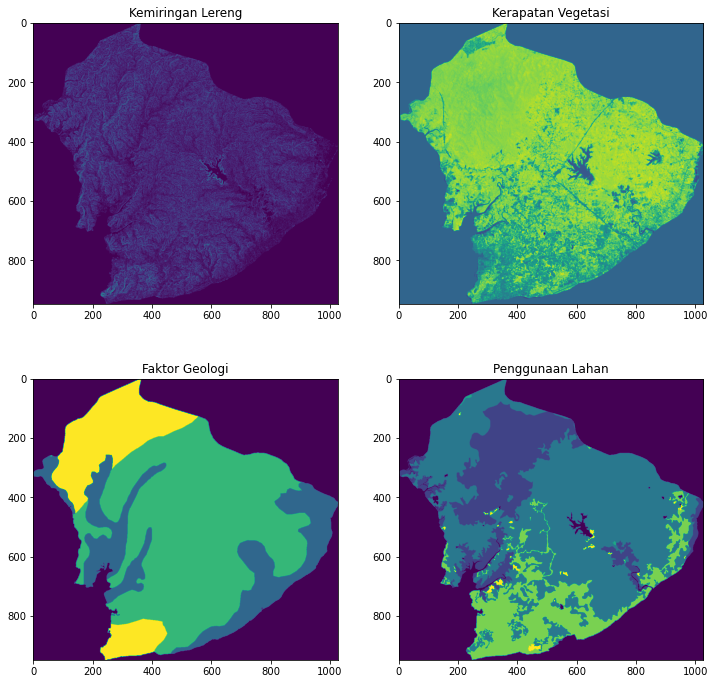

In [35]:
file1 = r"F:\Documents\ArcGIS\Data Penelitian\Data Mahakam Fisika\Data Machine Learning Real\Kemiringan Lereng1.tif"
file2 = r"F:\Documents\ArcGIS\Data Penelitian\Data Mahakam Fisika\Data Machine Learning Real\Kerapatan Vegetasi1.tif"
file3 = r"F:\Documents\ArcGIS\Data Penelitian\Data Mahakam Fisika\Data Machine Learning Real\Litologi Batuan Raster1.tif"
file4 = r"F:\Documents\ArcGIS\Data Penelitian\Data Mahakam Fisika\Data Machine Learning Real\Penggunaan Lahan Raster1.tif"

save = r"E:\Working\Karya Tulis\Bahan Paper\PAPER MAHAKAM FISIKA"

def norm(data):
    MaxAmp = max(max(data), min(data))
    dataNorm = data / MaxAmp
    return dataNorm

Slope = rio.open(file1)
Vegetasi = rio.open(file2)
Batuan = rio.open(file3)
Lahan = rio.open(file4)

Dataset = [Slope.read()[0], Vegetasi.read()[0], Batuan.read()[0], Lahan.read()[0]]
Title = ["Lereng", "Vegetasi", "Batuan", "Lahan"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax[0][0].imshow(Slope.read()[0])
ax[0][0].set_title("Kemiringan Lereng")
ax[0][1].imshow(Vegetasi.read()[0])
ax[0][1].set_title("Kerapatan Vegetasi")
ax[1][0].imshow(Batuan.read()[0])
ax[1][0].set_title("Faktor Geologi")
ax[1][1].imshow(Lahan.read()[0])
ax[1][1].set_title("Penggunaan Lahan")

fig.savefig(save + "/" + "Parameter Kerentanan Longsor")
plt.show()

In [77]:
S = Slope.read()[0].flatten().shape
V = Vegetasi.read()[0].flatten().shape
B = Batuan.read()[0].flatten().shape
L = Lahan.read()[0].flatten().shape

print(len(Dataset))
df = pd.DataFrame()
for i in range(len(Dataset)):
    df[Title[i]] = Dataset[i].flatten()

print(df)

4
        Lereng  Vegetasi  Batuan  Lahan
0          0.0       0.0       0      0
1          0.0       0.0       0      0
2          0.0       0.0       0      0
3          0.0       0.0       0      0
4          0.0       0.0       0      0
...        ...       ...     ...    ...
972643     0.0       0.0       0      0
972644     0.0       0.0       0      0
972645     0.0       0.0       0      0
972646     0.0       0.0       0      0
972647     0.0       0.0       0      0

[972648 rows x 4 columns]


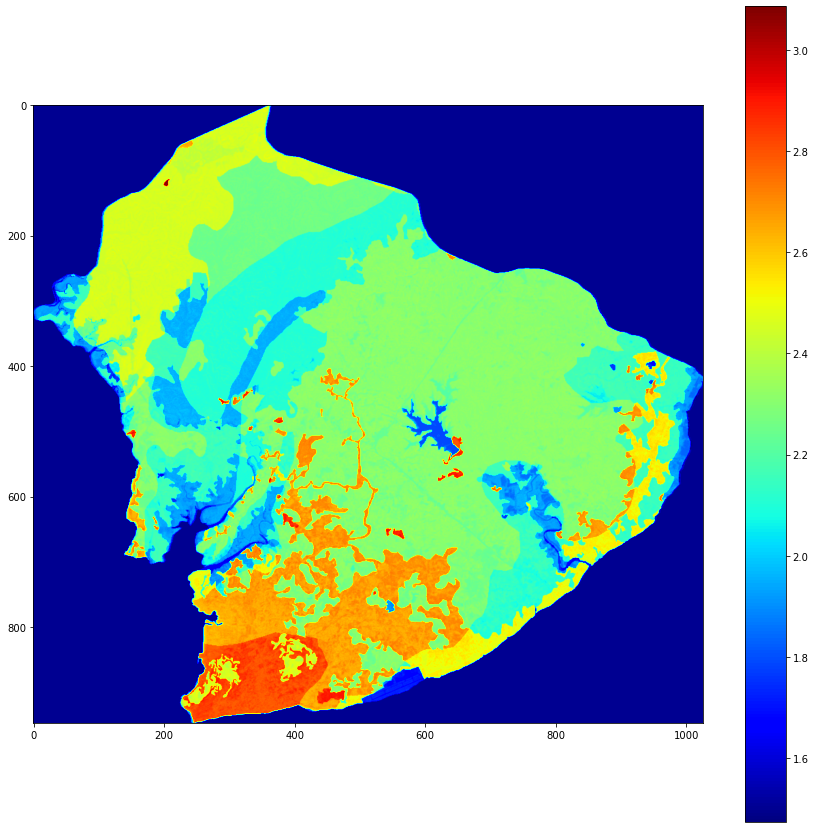

In [81]:
# Manual

import matplotlib.cm as cm

data_lereng = norm(df["Lereng"].values)
data_vegetasi = df["Vegetasi"].values
data_batuan = df["Batuan"].values
data_lahan = df["Lahan"].values

data_kerentanan = 1.5 + 0.15 * data_lereng + 0.2 * data_vegetasi + 0.15 * data_batuan + 0.2 * data_lahan

df["Kerentanan"] = data_kerentanan

Kerentanan = data_kerentanan.reshape(948, 1026)

fig, ax = plt.subplots(1, figsize=(15, 15))
psm = ax.imshow(Kerentanan, interpolation='bilinear', cmap="jet")
fig.colorbar(psm, ax=ax)
fig.savefig(save + "/" + "Peta Kerentanan Tanah Longsor")
plt.show()

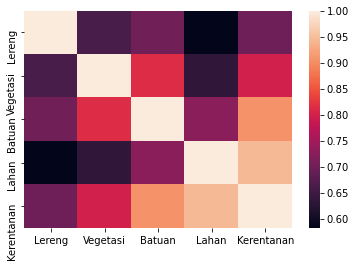

In [82]:
import seaborn as sns

# Machine Learning

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig(save + "/" + "Peta Korelasi Parameter")
plt.show()

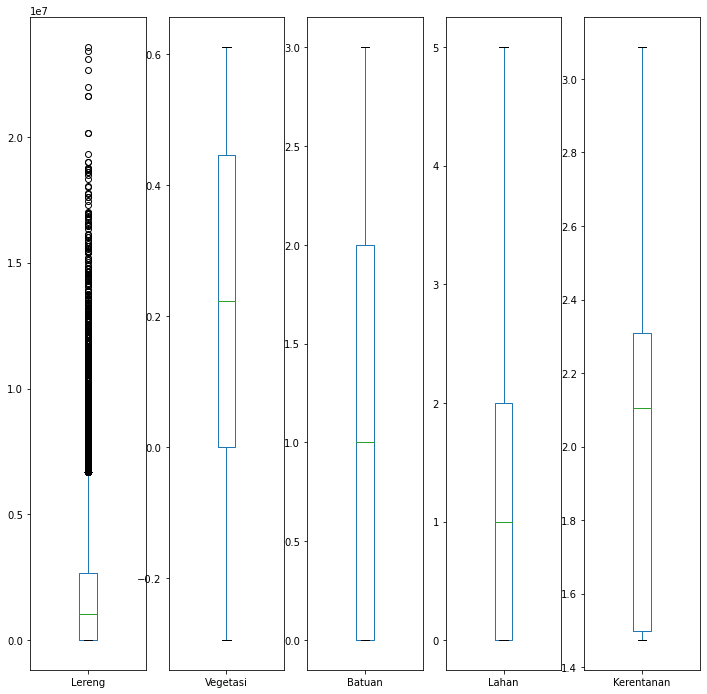

In [51]:
df.plot(kind="box", subplots=True, layout=(1, 5), figsize=(12, 12), sharex=False, sharey=False)
plt.savefig(save + "/" + "Peta Countbox")
plt.show()

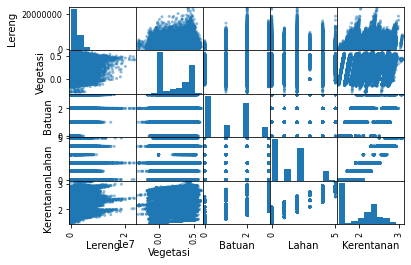

In [50]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.savefig(save + "/" + "Peta Scatter Matrix")
plt.show()

In [83]:
# Processing Data
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x = df.drop(["Kerentanan"], axis=1)
y = df["Kerentanan"].values

for i in range(len(y)):
    if y[i] <= 2.5:
        y[i] = 1
    elif 2.5 < y[i] <= 3.7:
        y[i] = 2
    elif y[i] > 3.7:
        y[i] = 3

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)
Report = classification_report(y_test, predictions)
Matrix = confusion_matrix(y_test, predictions)
Score = accuracy_score(y_test, predictions)

print("Tingkat Akurasi Model Kerentanan Tanah Longsor Menggunakan Sistem Machine Learning Adalah", Score)

Tingkat Akurasi Model Kerentanan Tanah Longsor Menggunakan Sistem Machine Learning Adalah 0.9037988999126099
